<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from PIL import Image

import pathlib

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
# import keras_tuner as kt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Recognizing and Understanding Data

**Let's check how many images there are.**

In [ ]:
# !unzip /content/drive/MyDrive/cat_dog_data.zip
!unzip -q /content/drive/MyDrive/cat_dog_data.zip

In [ ]:
!ls "/content/data/train/"

cat  dog


In [ ]:
train_dir = '/content/data/train'
val_dir = '/content/data/validation'
total_train = len(os.listdir('/content/data/train/dog')) + len(os.listdir('/content/data/train/cat'))
total_val = len(os.listdir('/content/data/validation/dog')) + len(os.listdir('/content/data/validation/cat'))
total_test = len(os.listdir('/content/data/test/'))

In [ ]:
len(os.listdir('/content/data/train/dog')), len(os.listdir('/content/data/train/cat'))

(5026, 12500)

In [ ]:
total_train,total_val,total_test

(17526, 2290, 6897)

**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [ ]:
train_data_gen[0][0][0]

array([[[0.61960787, 0.62352943, 0.6039216 ],
        [0.6117647 , 0.6156863 , 0.59607846],
        [0.6       , 0.6039216 , 0.58431375],
        ...,
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.654902  , 0.654902  , 0.64705884]],

       [[0.62352943, 0.627451  , 0.60784316],
        [0.62352943, 0.627451  , 0.60784316],
        [0.6156863 , 0.61960787, 0.6       ],
        ...,
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.654902  , 0.654902  , 0.64705884]],

       [[0.6156863 , 0.61960787, 0.6       ],
        [0.62352943, 0.627451  , 0.60784316],
        [0.62352943, 0.627451  , 0.60784316],
        ...,
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.65882355, 0.65882355, 0.6509804 ],
        [0.654902  , 0.654902  , 0.64705884]],

       ...,

       [[0.73333335, 0.73333335, 0.73333335],
        [0.7568628 , 0.7568628 , 0.7568628 ],
        [0.7568628 , 0

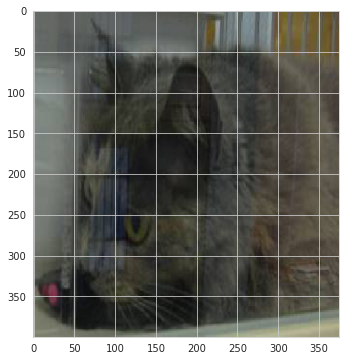

In [ ]:
plt.imshow(train_data_gen[0][0][20],cmap='gray')

# Data Preprocessing

## Defining Input Shape

In [ ]:
for image in os.listdir(train_path+'cat'):
  print(imread(train_path+'cat/'+image).shape)
  break

(324, 230, 3)


In [ ]:
train_path="/content/data/train/"
x1 = [imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat')] 
y1 = [imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat')] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


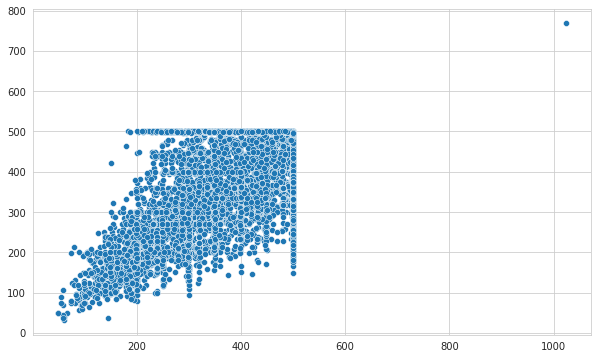

In [ ]:
sns.scatterplot(x1,y1);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


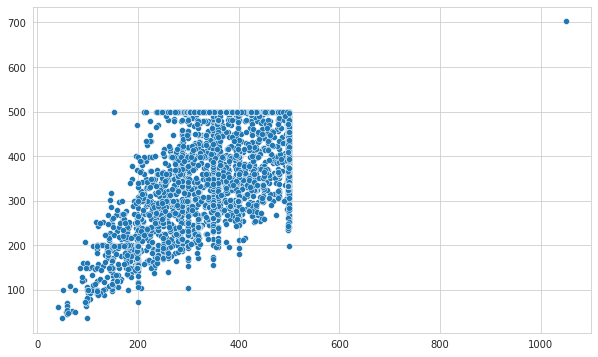

In [ ]:
train_path="/content/data/train/"
x2 = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog')] 
y2 = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog')]
sns.scatterplot(x2,y2);

In [ ]:
np.mean(x1), np.median(x1),np.mean(y1), np.median(y1),np.mean(x2), np.median(x2),np.mean(y2), np.median(y2)

(410.52264,
 470.0,
 356.46712,
 374.0,
 398.9930362116992,
 426.0,
 365.0505372065261,
 374.0)

In [ ]:
import statistics as stat
stat.mode(x1),stat.mode(y1),stat.mode(x2),stat.mode(y2)

(499, 374, 500, 374)

**Let's decide on the final dimension of these images.**

In [ ]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 375
IMG_WIDTH = 425

## Scalling

**Let's check the images if they are needed to be scaled or not**

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
#define image dataset
# Data Augmentation

image_generator = ImageDataGenerator(
        rescale=1/255
        # ,
        # rotation_range=10, # rotation
        # width_shift_range=0.2, # horizontal shift
        # height_shift_range=0.2, # vertical shift
        # zoom_range=0.2, # zoom
        # horizontal_flip=True, # horizontal flip
        # brightness_range=[0.2,1.2],# brightness
        )

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
train_data_gen = image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True
                                                          #  subset='training'
                                                           )
val_data_gen = image_generator.flow_from_directory(directory=val_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=False
                                                          #  subset='validation'
                                                           )

Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


# Modelling

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 373, 423, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 186, 211, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 184, 209, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 92, 104, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 102, 64)       36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 51, 64)      

In [ ]:
model1.fit(train_data_gen,
          epochs=10,
          steps_per_epoch=len(train_data_gen),
          validation_data=val_data_gen,
          validation_steps=len(val_data_gen),
          callbacks=[early_stop])

Epoch 1/10
137/137 [==============================] - 128s 891ms/step - loss: 0.6420 - accuracy: 0.7176 - val_loss: 0.6958 - val_accuracy: 0.6000
Epoch 2/10
137/137 [==============================] - 107s 777ms/step - loss: 0.5096 - accuracy: 0.7557 - val_loss: 0.6600 - val_accuracy: 0.6607
Epoch 3/10
137/137 [==============================] - 107s 773ms/step - loss: 0.4701 - accuracy: 0.7673 - val_loss: 0.5602 - val_accuracy: 0.7118
Epoch 4/10
137/137 [==============================] - 107s 775ms/step - loss: 0.4301 - accuracy: 0.7968 - val_loss: 0.5521 - val_accuracy: 0.7358
Epoch 5/10
137/137 [==============================] - 107s 780ms/step - loss: 0.3943 - accuracy: 0.8172 - val_loss: 0.5150 - val_accuracy: 0.7537
Epoch 6/10
137/137 [==============================] - 107s 780ms/step - loss: 0.3611 - accuracy: 0.8386 - val_loss: 0.5946 - val_accuracy: 0.7349
Epoch 7/10
137/137 [==============================] - 107s 780ms/step - loss: 0.3167 - accuracy: 0.8616 - val_loss: 0.6902 -

In [ ]:
model1.metrics_names

['loss', 'accuracy']

# Evaluation on Test Data

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.642,0.718,0.696,0.600
1,0.510,0.756,0.660,0.661
2,0.470,0.767,0.560,0.712
3,0.430,0.797,0.552,0.736
4,0.394,0.817,0.515,0.754


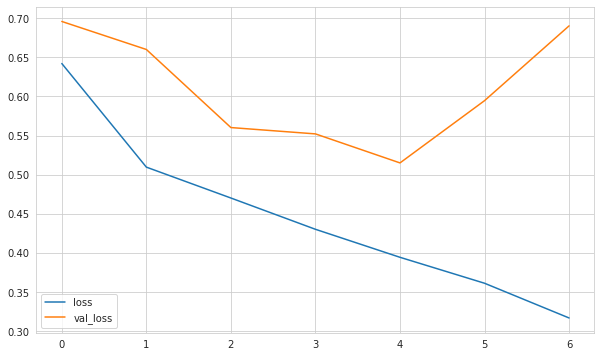

In [ ]:
summary[["loss", "val_loss"]].plot();

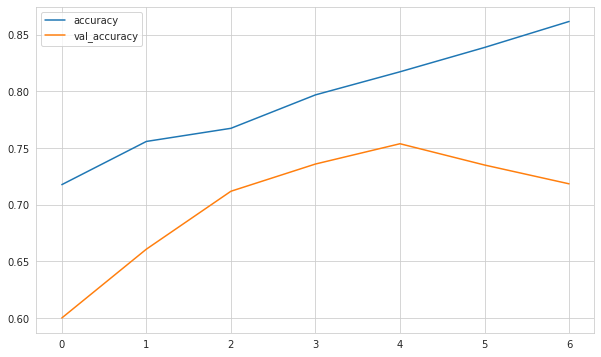

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(val_data_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18/18 [==============================] - 11s 594ms/step - loss: 0.5150 - accuracy: 0.7537
Test loss: 0.5149698257446289
Test accuracy: 0.7537118196487427


In [ ]:
pred_prob = model1.predict(val_data_gen)
pred_prob

array([[0.282431  ],
       [0.2862243 ],
       [0.67728215],
       ...,
       [0.677552  ],
       [0.8390271 ],
       [0.9999819 ]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.4
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_test = val_data_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[864, 355],
       [236, 835]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1219
           1       0.70      0.78      0.74      1071

    accuracy                           0.74      2290
   macro avg       0.74      0.74      0.74      2290
weighted avg       0.75      0.74      0.74      2290



In [ ]:
model1.save('cat_dog_model.h5')

# Prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random

In [ ]:
model=load_model('cat_dog_model.h5')

In [ ]:
test_dir = "/content/data/test/"
test_data_gen = image_generator.flow_from_directory(directory=test_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           batch_size=batch_size,
                                                           shuffle=True                                                      
                                                           )

Found 0 images belonging to 0 classes.


In [ ]:
len(os.listdir('/content/data/test/'))

6897

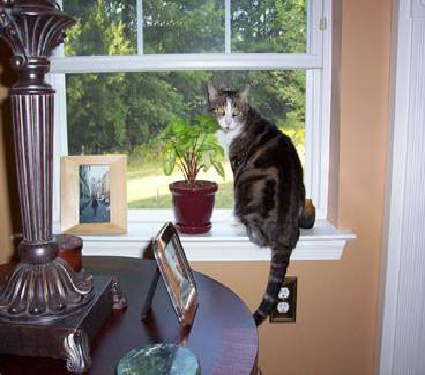

In [ ]:
random_image = random.sample(os.listdir(test_dir), 1)
image_path = test_dir + random_image[0]
my_image = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
my_image

In [ ]:
type(my_image)


PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)
my_image.shape

(375, 425, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 375, 425, 3)

In [ ]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [ ]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  class_names = list(train_data_gen.class_indices.keys())
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_dir), 1)
  img_path = test_dir + random_image[0]
  img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

prediction_probability:  0.0


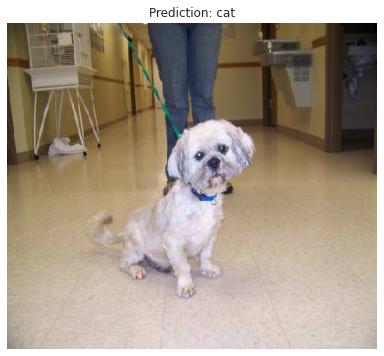

In [ ]:
pred_and_plot(model, (IMG_HEIGHT, IMG_WIDTH))

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>